In [ ]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
import pandas as pd
from sklearn.datasets import fetch_20newsgroups

In [ ]:
data = fetch_20newsgroups(subset='train')

In [ ]:
df = pd.DataFrame(data.data, columns=['text'])
df.head()

,text
0,From: lerxst@wam.umd.edu (where's my thing)\nS...
1,From: guykuo@carson.u.washington.edu (Guy Kuo)...
2,From: twillis@ec.ecn.purdue.edu (Thomas E Will...
3,From: jgreen@amber (Joe Green)\nSubject: Re: W...
4,From: jcm@head-cfa.harvard.edu (Jonathan McDow...


#### Using Pandas - 5 different features to capture the text complexity

In [ ]:
# Let's capture the number of characters in each string in a new column:
'''
remove trailing whitespaces, including new lines, in a string before 
counting the number of characters by adding the strip() method before the len() method: 
df['num_char'] = df['text'].str.strip().str.len().
'''
df['num_char'] = df['text'].str.len()

In [ ]:
# Let's capture the number of words in each text in a new column:

df['num_words'] = df['text'].str.split().str.len()

In [ ]:
df.head()

,text,num_char,num_words
0,From: lerxst@wam.umd.edu (where's my thing)\nS...,721,123
1,From: guykuo@carson.u.washington.edu (Guy Kuo)...,858,123
2,From: twillis@ec.ecn.purdue.edu (Thomas E Will...,1981,339
3,From: jgreen@amber (Joe Green)\nSubject: Re: W...,815,113
4,From: jcm@head-cfa.harvard.edu (Jonathan McDow...,1120,171


In [ ]:
# Let's capture the number of unique words in each text in a new column:
# Using set() property of Python, we can easily check for the unique values. 
'''
Python will interpret the same word as two different words if one has a capital letter. 
To avoid this behavior, we introduce the lower() method before the split() method.

'''

df['num_vocab'] = df['text'].str.lower().str.split().apply(set).str.len()

In [ ]:
# Let's create a feature that captures the lexical diversity, that is, the total number of words to the number of unique words:

df['lexical_div'] = df['num_words'] / df['num_vocab']

In [ ]:
# Let's calculate the average word length by dividing the number of characters by the number of words:

df['ave_word_length'] = df['num_char'] / df['num_words']

In [ ]:
df.head()

,text,num_char,num_words,num_vocab,lexical_div,ave_word_length
0,From: lerxst@wam.umd.edu (where's my thing)\nS...,721,123,93,1.322581,5.861789
1,From: guykuo@carson.u.washington.edu (Guy Kuo)...,858,123,99,1.242424,6.975610
2,From: twillis@ec.ecn.purdue.edu (Thomas E Will...,1981,339,219,1.547945,5.843658
3,From: jgreen@amber (Joe Green)\nSubject: Re: W...,815,113,96,1.177083,7.212389
4,From: jcm@head-cfa.harvard.edu (Jonathan McDow...,1120,171,139,1.230216,6.549708


In [ ]:
# Visualization 
import matplotlib.pyplot as plt

In [ ]:
df['target'] = data.target
df.head()

,text,num_char,num_words,num_vocab,lexical_div,ave_word_length,target
0,From: lerxst@wam.umd.edu (where's my thing)\nS...,721,123,93,1.322581,5.861789,7
1,From: guykuo@carson.u.washington.edu (Guy Kuo)...,858,123,99,1.242424,6.975610,4
2,From: twillis@ec.ecn.purdue.edu (Thomas E Will...,1981,339,219,1.547945,5.843658,4
3,From: jgreen@amber (Joe Green)\nSubject: Re: W...,815,113,96,1.177083,7.212389,1
4,From: jcm@head-cfa.harvard.edu (Jonathan McDow...,1120,171,139,1.230216,6.549708,14


In [ ]:
# Create a function to display a histogram of a feature for each one of the news topics.

def plot_features(df, text_var):
    nb_rows = 5
    nb_cols = 4
    
    fig, axs = plt.subplots(nb_rows, nb_cols, figsize=(12, 12))
    plt.subplots_adjust(wspace=None, hspace=0.4)

    n = 0
    for i in range(0, nb_rows):
        for j in range(0, nb_cols):
            axs[i, j].hist(df[df.target==n][text_var], bins=30)
            axs[i, j].set_title(text_var + ' | ' + str(n))
            n += 1
    plt.show()

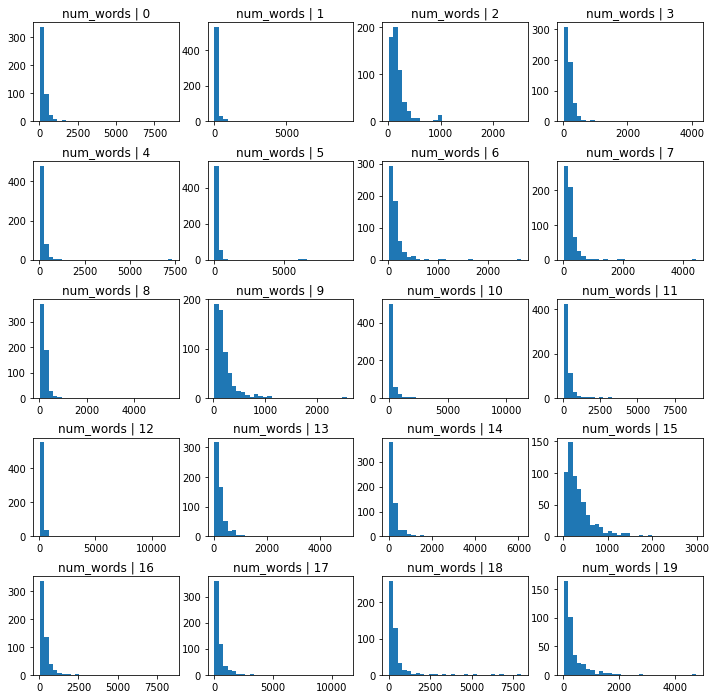

In [ ]:
# Run the function for the number of words feature:

'''
The preceding code block returns a plot where you can see the distribution of
the number of words in each one of the 20 news topics, numbered from 0 to 19 in the plot title:
'''

plot_features(df, 'num_words')

##### Pandas Text Methods 

In [ ]:
 # https://pandas.pydata.org/pandas-docs/stable/user_guide/text.html#method-summary

#### NLTK - Estimating text complexity by counting sentences

In [ ]:
from nltk.tokenize import sent_tokenize

In [ ]:
text = """
The alarm rang at 7 in the morning as it usually did on Tuesdays. She rolled over,
stretched her arm, and stumbled to the button till she finally managed to switch it off.
Reluctantly, she got up and went for a shower. The water was cold as the day before the engineers
did not manage to get the boiler working. Good thing it was still summer.
Upstairs, her cat waited eagerly for his morning snack. Miaow! he voiced with excitement
as he saw her climb the stairs.
"""

In [ ]:
# Let's now separate the string we created in step 2 into sentences using the NLTK sentence tokenizer:

sent_tokenize(text)

['\nThe alarm rang at 7 in the morning as it usually did on Tuesdays.',
 'She rolled over,\nstretched her arm, and stumbled to the button till she finally managed to switch it off.',
 'Reluctantly, she got up and went for a shower.',
 'The water was cold as the day before the engineers\ndid not manage to get the boiler working.',
 'Good thing it was still summer.',
 'Upstairs, her cat waited eagerly for his morning snack.',
 'Miaow!',
 'he voiced with excitement\nas he saw her climb the stairs.']

In [ ]:
# Let's count the number of sentences in the text variable:

len(sent_tokenize(text))

8

In [ ]:
# Let's load the train subset of the 20 Newsgroup dataset into a pandas dataframe:

data = fetch_20newsgroups(subset='train')
df2 = pd.DataFrame(data.data, columns=['text'])
df2.head()

,text
0,From: lerxst@wam.umd.edu (where's my thing)\nS...
1,From: guykuo@carson.u.washington.edu (Guy Kuo)...
2,From: twillis@ec.ecn.purdue.edu (Thomas E Will...
3,From: jgreen@amber (Joe Green)\nSubject: Re: W...
4,From: jcm@head-cfa.harvard.edu (Jonathan McDow...


In [ ]:
df2 = df2.loc[1:10]
df2

,text
1,From: guykuo@carson.u.washington.edu (Guy Kuo)...
2,From: twillis@ec.ecn.purdue.edu (Thomas E Will...
3,From: jgreen@amber (Joe Green)\nSubject: Re: W...
4,From: jcm@head-cfa.harvard.edu (Jonathan McDow...
5,From: dfo@vttoulu.tko.vtt.fi (Foxvog Douglas)\...
6,From: bmdelane@quads.uchicago.edu (brian manni...
7,From: bgrubb@dante.nmsu.edu (GRUBB)\nSubject: ...
8,From: holmes7000@iscsvax.uni.edu\nSubject: WIn...
9,From: kerr@ux1.cso.uiuc.edu (Stan Kerr)\nSubje...
10,From: irwin@cmptrc.lonestar.org (Irwin Arnstei...


In [ ]:
df2['text'] = df2['text'].str.split('Lines:').apply(lambda x: x[1])
df2

,text
1,11\nNNTP-Posting-Host: carson.u.washington.ed...
2,"36\n\nwell folks, my mac plus finally gave up..."
3,14\nDistribution: world\nNNTP-Posting-Host: a...
4,23\n\nFrom article <C5owCB.n3p@world.std.com>...
5,58\n\nIn article <1r1eu1$4t@transfer.stratus....
6,12\n\nThere were a few people who responded t...
7,44\nDistribution: world\nNNTP-Posting-Host: d...
8,10\n\nI have win 3.0 and downloaded several i...
9,29\n\njap10@po.CWRU.Edu (Joseph A. Pellettier...
10,13\n\nI have a line on a Ducati 900GTS 1978 m...


In [ ]:
# Finally, let's create a variable that captures the number of sentences per text variable:
df2['num_sent'] = df2['text'].apply(sent_tokenize).apply(len)
df2.head()

,text,num_sent
1,11\nNNTP-Posting-Host: carson.u.washington.ed...,6
2,"36\n\nwell folks, my mac plus finally gave up...",9
3,14\nDistribution: world\nNNTP-Posting-Host: a...,7
4,23\n\nFrom article <C5owCB.n3p@world.std.com>...,10
5,58\n\nIn article <1r1eu1$4t@transfer.stratus....,21


#### SK Learn - Creating features with bag-of-words and n-grams

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
df3 = pd.DataFrame(data.data, columns=['text'])

In [ ]:
# To make the interpretation of the results easier, let's remove punctuation and numbers from the text variable:
df3['text'] = df3['text'].str.replace('[^\w\s]','').str.replace('\d+', '')
df3

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  


,text
0,From lerxstwamumdedu wheres my thing\nSubject ...
1,From guykuocarsonuwashingtonedu Guy Kuo\nSubje...
2,From twillisececnpurdueedu Thomas E Willis\nSu...
3,From jgreenamber Joe Green\nSubject Re Weitek ...
4,From jcmheadcfaharvardedu Jonathan McDowell\nS...
...,...
11309,From jimzisfeinfactorycom Jim Zisfein \nSubjec...
11310,From ebodinpearltuftsedu\nSubject Screen Death...
11311,From westesnetcomcom Will Estes\nSubject Mount...
11312,From stevehcrlgw Steven Collins\nSubject Re Sp...


In [ ]:
# Let's now set up CountVectorizer() so that, before creating the BoW, 
# it puts the text in lowercase, removes stop words, and retains words that appear at least in 5% of the text pieces:

vectorizer = CountVectorizer(lowercase=True,
                             stop_words='english',
                             ngram_range=(1, 1),
                             min_df=0.05)

In [ ]:
# Let's fit CountVectorizer() so that it learns which words should be used in the BoW:

vectorizer.fit(df3['text'])

CountVectorizer(min_df=0.05, stop_words='english')

In [ ]:
# Create BoW
X = vectorizer.transform(df3['text'])

In [ ]:
bagofwords = pd.DataFrame(X.toarray(), columns = vectorizer.get_feature_names())
bagofwords.head()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,able,access,actually,ago,apr,article,articleid,ask,available,away,...,works,world,writes,wrong,wrote,xnewsreader,year,years,yes,youre
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,1,0,0,0,0,...,0,1,1,0,1,1,0,0,0,0
4,0,0,0,0,0,2,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0


#### SK Learn - Implementing term frequency-inverse document frequency

In [ ]:
# https://scikit-learn.org/stable/modules/feature_extraction.html#tfidf-term-weighting

from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
tfidf_vectorizer = TfidfVectorizer(lowercase=True,
                             stop_words='english',
                             ngram_range=(1, 1),
                             min_df=0.05)

In [ ]:
tfidf_vectorizer.fit(df3['text'])

TfidfVectorizer(min_df=0.05, stop_words='english')

In [ ]:
X = tfidf_vectorizer.transform(df3['text'])

In [ ]:
tfidf = pd.DataFrame(X.toarray(), columns = tfidf_vectorizer.get_feature_names())

tfidf.head()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,able,access,actually,ago,apr,article,articleid,ask,available,away,...,works,world,writes,wrong,wrote,xnewsreader,year,years,yes,youre
0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,...,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.27302,0.000000,0.0
1,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.356469,0.0,0.0,0.0,...,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.00000,0.000000,0.0
2,0.0,0.135765,0.123914,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,...,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.00000,0.000000,0.0
3,0.0,0.000000,0.000000,0.0,0.0,0.110035,0.000000,0.0,0.0,0.0,...,0.0,0.169635,0.100554,0.0,0.218197,0.233578,0.0,0.00000,0.000000,0.0
4,0.0,0.000000,0.000000,0.0,0.0,0.262692,0.000000,0.0,0.0,0.0,...,0.0,0.000000,0.120029,0.0,0.000000,0.000000,0.0,0.00000,0.264836,0.0


#### Pandas, NLTK - Cleaning and stemming text variables

In [ ]:
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
from sklearn.datasets import fetch_20newsgroups

In [ ]:
df4 = pd.DataFrame(data.data, columns=['text'])

In [ ]:
df["text"] = df['text'].str.replace('[^\w\s]','')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  """Entry point for launching an IPython kernel.


In [ ]:
# remove character
df['text'] = df['text'].str.replace('\d+', '')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  


In [ ]:
# Let's now set all cases in lowercase:
df['text'] = df['text'].str.lower()

In [ ]:
# Remove Stop Words
def remove_stopwords(text):
    stop = set(stopwords.words('english'))
    text = [word for word in text.split() if word not in stop]
    text = ' '.join(x for x in text)
    return text

In [ ]:
df['text'] = df['text'].apply(remove_stopwords)

In [ ]:
# word stemming in english 
# Let's create an instance of SnowballStemer for the English language:
stemmer = SnowballStemmer("english")

In [ ]:
 def stemm_words(text):
    text = [stemmer.stem(word) for word in text.split()]
    text = ' '.join(x for x in text)
    return text

In [ ]:
df['text'] = df['text'].apply(stemm_words)

In [ ]:
df.head()

,text,num_char,num_words,num_vocab,lexical_div,ave_word_length,target
0,lerxstwamumdedu where thing subject car nntppo...,721,123,93,1.322581,5.861789,7
1,guykuocarsonuwashingtonedu guy kuo subject si ...,858,123,99,1.242424,6.975610,4
2,twillisececnpurdueedu thoma e willi subject pb...,1981,339,219,1.547945,5.843658,4
3,jgreenamb joe green subject weitek p organ har...,815,113,96,1.177083,7.212389,1
4,jcmheadcfaharvardedu jonathan mcdowel subject ...,1120,171,139,1.230216,6.549708,14


Note that the only feature that needs to be derived before removing punctuation is the count of the sentences, 
as punctuation and capitalization are needed to define the boundaries of each sentence.